In [5]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score

sns.set(style="whitegrid")


In [8]:

df = pd.read_csv("wine.csv") 
df.head()


,id,alcohol,fixed_acidity,residual_sugar,quality,density
0,0,13.6,9.3,6.4,high,1.0005
1,1,14.0,11.2,2.0,medium,0.9912
2,2,8.2,11.6,0.9,low,0.9935
3,3,12.7,12.9,6.6,low,1.0002
4,4,10.4,13.9,13.8,medium,0.9942


In [11]:
df.describe()


,id,alcohol,fixed_acidity,residual_sugar,density
count,1000.000000,990.000000,1000.000000,997.000000,1000.000000
mean,499.500000,11.038081,10.174300,7.685757,0.997505
std,288.819436,1.763647,3.452693,4.213067,0.004300
min,0.000000,8.000000,4.000000,0.500000,0.990000
25%,249.750000,9.500000,7.100000,4.100000,0.993900
50%,499.500000,11.000000,10.400000,7.500000,0.997400
75%,749.250000,12.600000,13.125000,11.500000,1.001200
max,999.000000,14.000000,16.000000,15.000000,1.005000


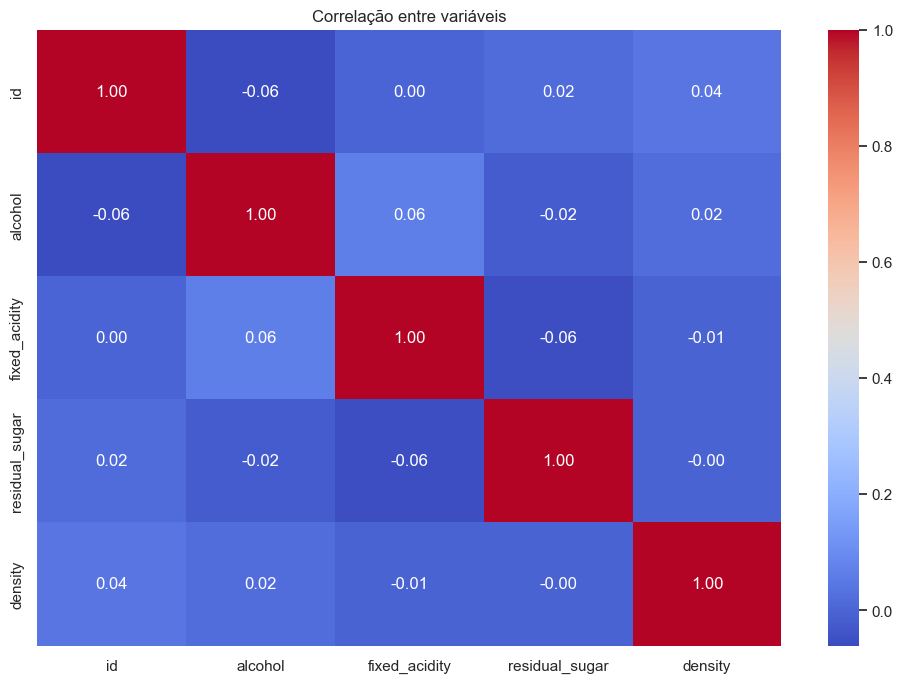

In [13]:
plt.figure(figsize=(12, 8))

df_numerico = df.select_dtypes(include='number')

sns.heatmap(df_numerico.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlação entre variáveis")
plt.show()


In [ ]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['id', 'alcohol', 'fixed_acidity', 'residual_sugar', 'quality',
       'density'],
      dtype='object')


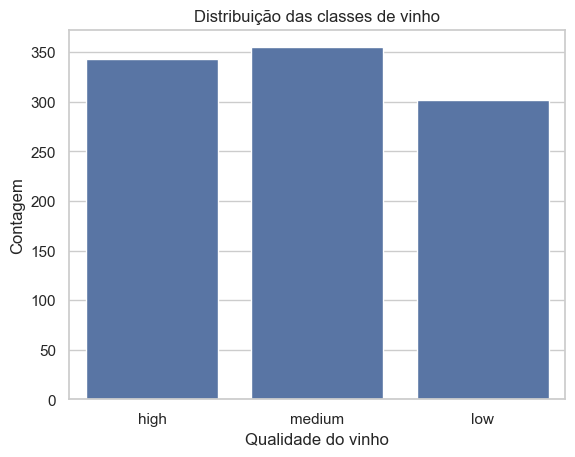

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='quality', data=df)
plt.title("Distribuição das classes de vinho")
plt.xlabel("Qualidade do vinho")
plt.ylabel("Contagem")
plt.show()



In [22]:
from sklearn.preprocessing import StandardScaler


X = df.drop(columns=['id', 'quality'])  
y_true = df['quality']  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia (Soma das distâncias intra-cluster)')
plt.title('Método do Cotovelo para Definir K')
plt.grid(True)
plt.show()


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values